# Solución a objetos estelares compactos autogravitantes con distribución anisótropa 

In [2]:
from scipy.integrate import solve_ivp
from scipy.integrate import quad
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import astropy.constants as ast

In [3]:
M = 1.4*(1.989e30) #masa total
#M = 1.989e5
#R = 696340e3 #Radio
R = 10e3
#P = 2.65e16 #Presión central
P = 10e34
#D = 150e3 #Densidad central
D = 8e18
c = ast.c.value
G = ast.G.value

In [4]:
#Son básicamente las magnitudes tildadas:

r_ = sym.Symbol('ŕ') #Radio normalizado
p_ = sym.Symbol('ṕ') #Presión radial normalizada
pt_ = sym.Symbol('ṕt') #Presión tangencial normalizada 
d_ = sym.Symbol('ð') #Densidad normalizada
m_ = sym.Symbol('ḿ') #Masa normalizada

#Ecuaciones adimensionales auxiliares
u = M*G/(R*(c)**2)
k = P/(D*(c)**2)
n = (D/(M/((4/3)*np.pi*(R**3))))


**NOTA**: los símbolos aparecen como r,p,dt,d y m, pero hacen referencia a tales magnitudes normalizadas, en caso de hallar el r sin normalizar basta con multiplicar con R

## Ecuaciones estructurales estelares

In [21]:
#Ecuación estructural newtoniana
def dPdr_N(m,d,aniso,u,k):
    return  -(u/k)*(m*d/(r_**2)) + 2*aniso/r_ 

#Ecuación estructural de Einstein
def dPdr_E(m,d,aniso):
        return ((-u/k)*(m*d/(r_**2)))*(1+k*(p_/d))*(1+3*n*k*((p_*r_**3)/m))*(1-2*u*(m/r_))**-1 + 2*aniso/r_

In [30]:
def density(n):
    B = (5/3)*(1-3/n) 
    return (1-B*r_**2) #Perfil de densidades tipo Gokhroo-Mehra

def mass(n):
    f = ((n*r_**2)*density(n))
    return sym.integrate(f,(r_))

In [24]:
density(n)

1 - 1.25118274054133*ŕ**2

Text(0.5, 0, 'Distancia radial normalizada')

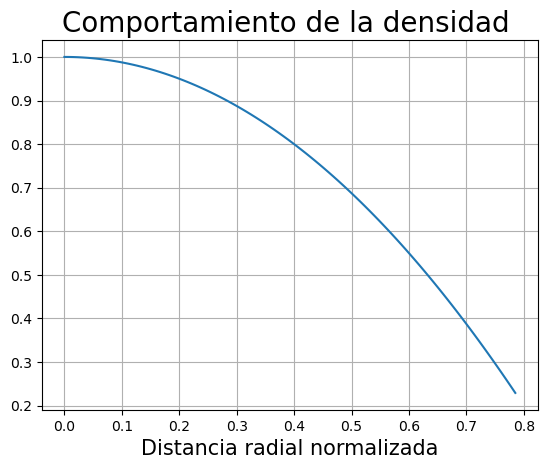

In [28]:
den = sym.lambdify(r_,density(n))
x=np.linspace(0,0.785,100)
plt.plot(x, den(x))
plt.grid()
plt.title('Comportamiento de la densidad ', fontsize=20)
plt.xlabel('Distancia radial normalizada', fontsize=15)

In [9]:
mass(n)

-3.01138663102913*ŕ**5 + 4.01138663102913*ŕ**3

Text(0, 0.5, 'Masa adimensional')

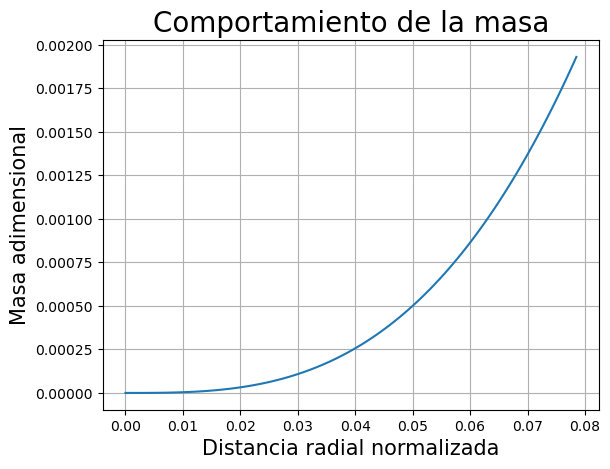

In [32]:
m = sym.lambdify(r_,mass(n))
x=np.linspace(0,0.0785,100)
plt.grid()
plt.plot(x, m(x))
plt.title('Comportamiento de la masa', fontsize=20)
plt.xlabel('Distancia radial normalizada', fontsize=15)
plt.ylabel('Masa adimensional', fontsize=15)

## Ecuaciones de anisotropía

In [33]:
def newt(C,m,n):
    return (C*G*m*density(n))/r_ #Anisotropía para el encuadre Newton

def HIM(C):
    return C*(p_/r_) #Anisotropía de Horvat-Ilijic-Marunovic

In [34]:
def aniso_ein(den,mass,C):
    return G* (C/r_)*(1+p_/den)*(1+(4*np.pi*(r_**3)*p_/(mass)))*(1-2*(mass/r_))**-1

def aniso_n(C,n):
    return C * G * (mass(n)*density(n)/r_)

<lambdifygenerated-14>:2: RuntimeWarning: invalid value encountered in divide
  return (1 - 1.25118274054133*ŕ**2)*(-0.000200988977914777*ŕ**5 + 0.000267731977914777*ŕ**3)/ŕ


Text(0.5, 0, 'Distancia radial adimensional')

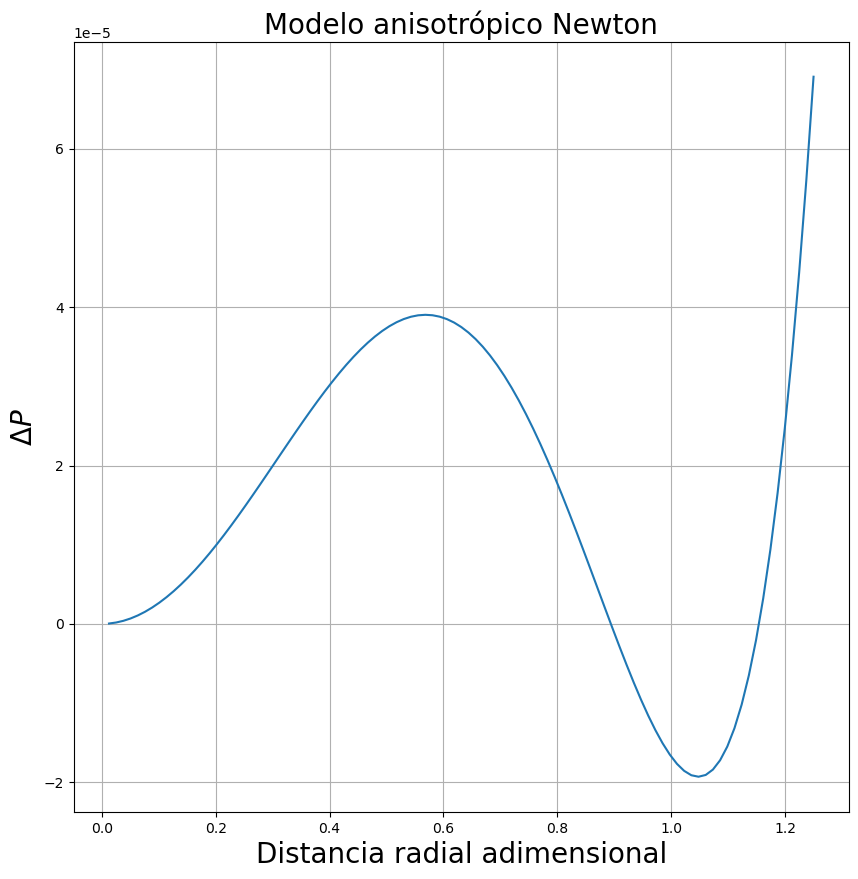

In [36]:
l = newt(1e6,mass(n),n)
s = sym.lambdify(r_,l)
rad = np.linspace(0,1.25,100)
plt.figure(figsize=(10,10))
plt.plot(rad, s(rad))
plt.grid()
plt.title('Modelo anisotrópico Newton',fontsize=20)
plt.ylabel(r'$\Delta P$', fontsize=20)
plt.xlabel('Distancia radial adimensional', fontsize=20)


## Solucion numérica a las ecuaciones estructurales

### Aproximación Newton

Text(0.5, 0, 'Distancia radial adimensional')

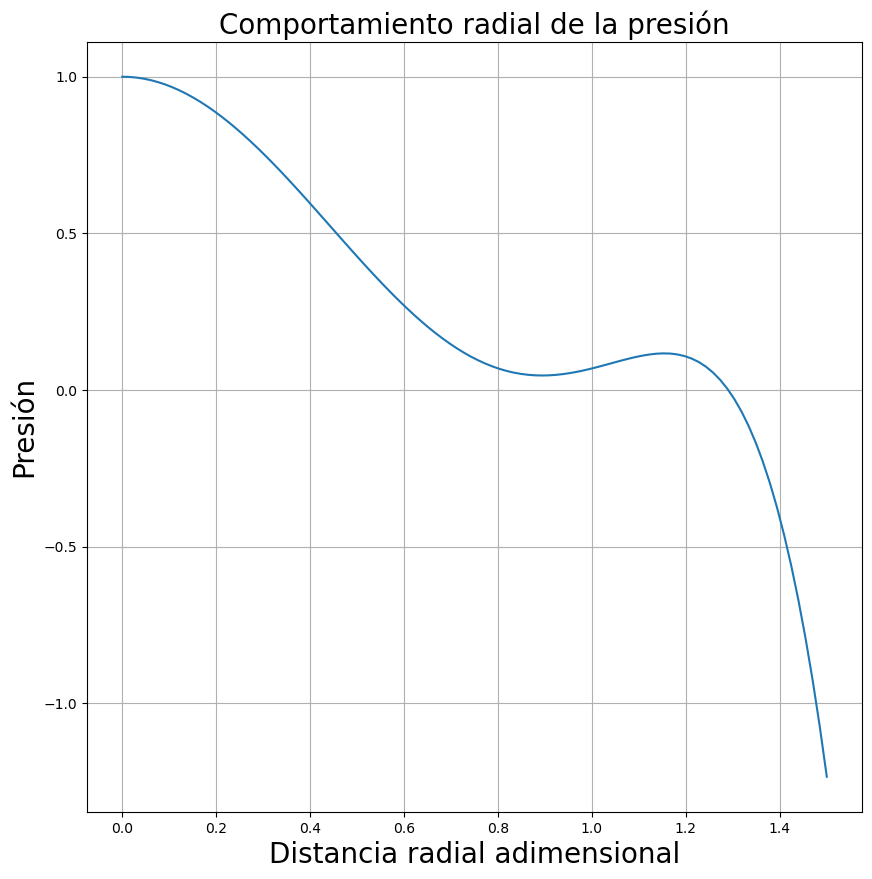

In [41]:
inte= sym.integrate(dPdr_N(mass(n),density(n),newt(10,mass(n),n),u,k),r_) +1
N = sym.lambdify(r_, inte)
x=np.linspace(0,1.5,100)
plt.figure(figsize=(10,10))

plt.plot(x, N(x))
plt.grid()
plt.title('Comportamiento radial de la presión',fontsize=20)
plt.ylabel('Presión', fontsize=20)
plt.xlabel(r'Distancia radial adimensional', fontsize=20)

Text(0.5, 0, 'Distancia radial adimensional')

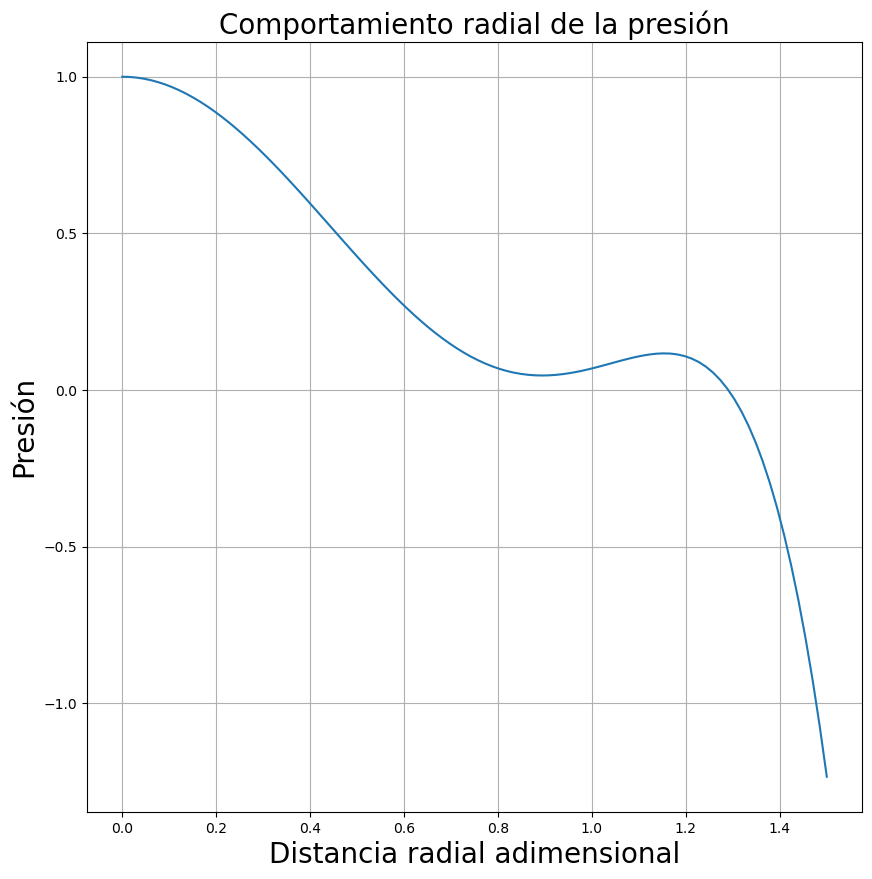

In [20]:
inter= sym.integrate(dPdr_N(mass(),density(),newt(10,mass())),r_) +1
N = sym.lambdify(r_, inter)
x=np.linspace(0,1.5,100)
plt.figure(figsize=(10,10))

plt.plot(x, N(x))
plt.grid()
plt.title('Comportamiento radial de la presión',fontsize=20)
plt.ylabel('Presión', fontsize=20)
plt.xlabel(r'Distancia radial adimensional', fontsize=20)

### Aproximación Einstein

Text(0.5, 0, 'Distancia radial adimensional')

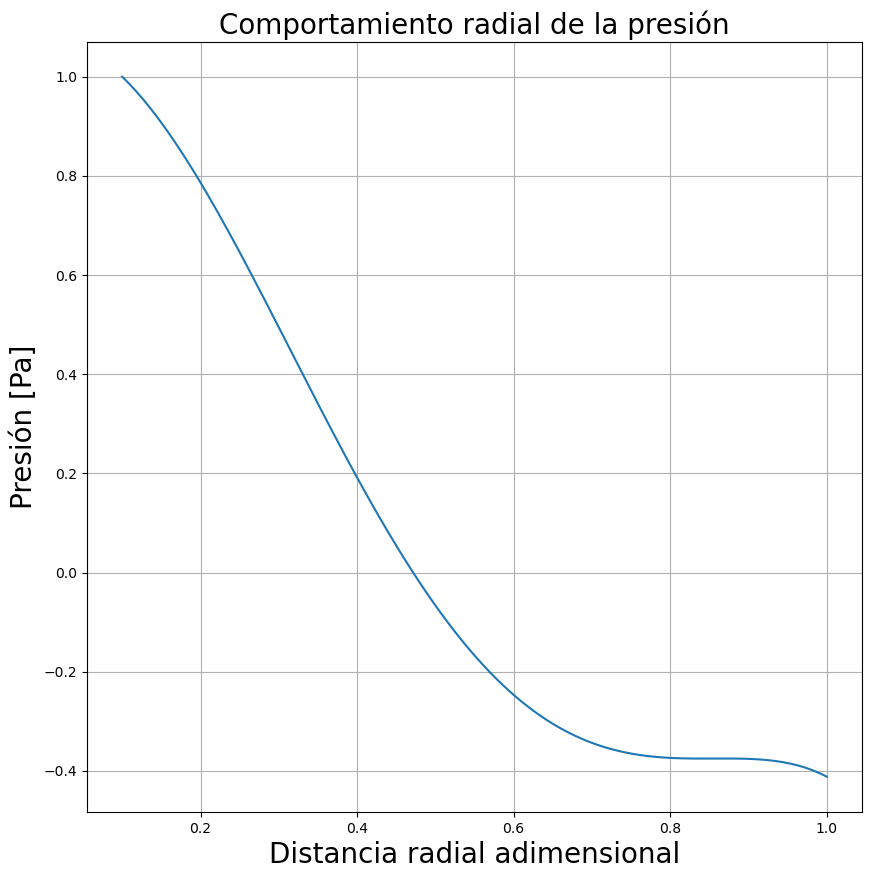

In [19]:
ein = dPdr_E(mass(),density(),aniso_ein(density(),mass(),10))
ein_var = sym.lambdify((r_,p_),ein) 


def ecu(p,r):
    return ein_var(r,p)

t_eval = np.linspace(0.1,1,200)
plt.figure(figsize=(10,10))


od = odeint(ecu,1,t_eval)

plt.plot(t_eval,od)
plt.grid()
plt.title('Comportamiento radial de la presión',fontsize=20)
plt.ylabel('Presión [Pa]', fontsize=20)
plt.xlabel(r'Distancia radial adimensional', fontsize=20)


## Variacion de parámetros

### Presión modelo newtoniano

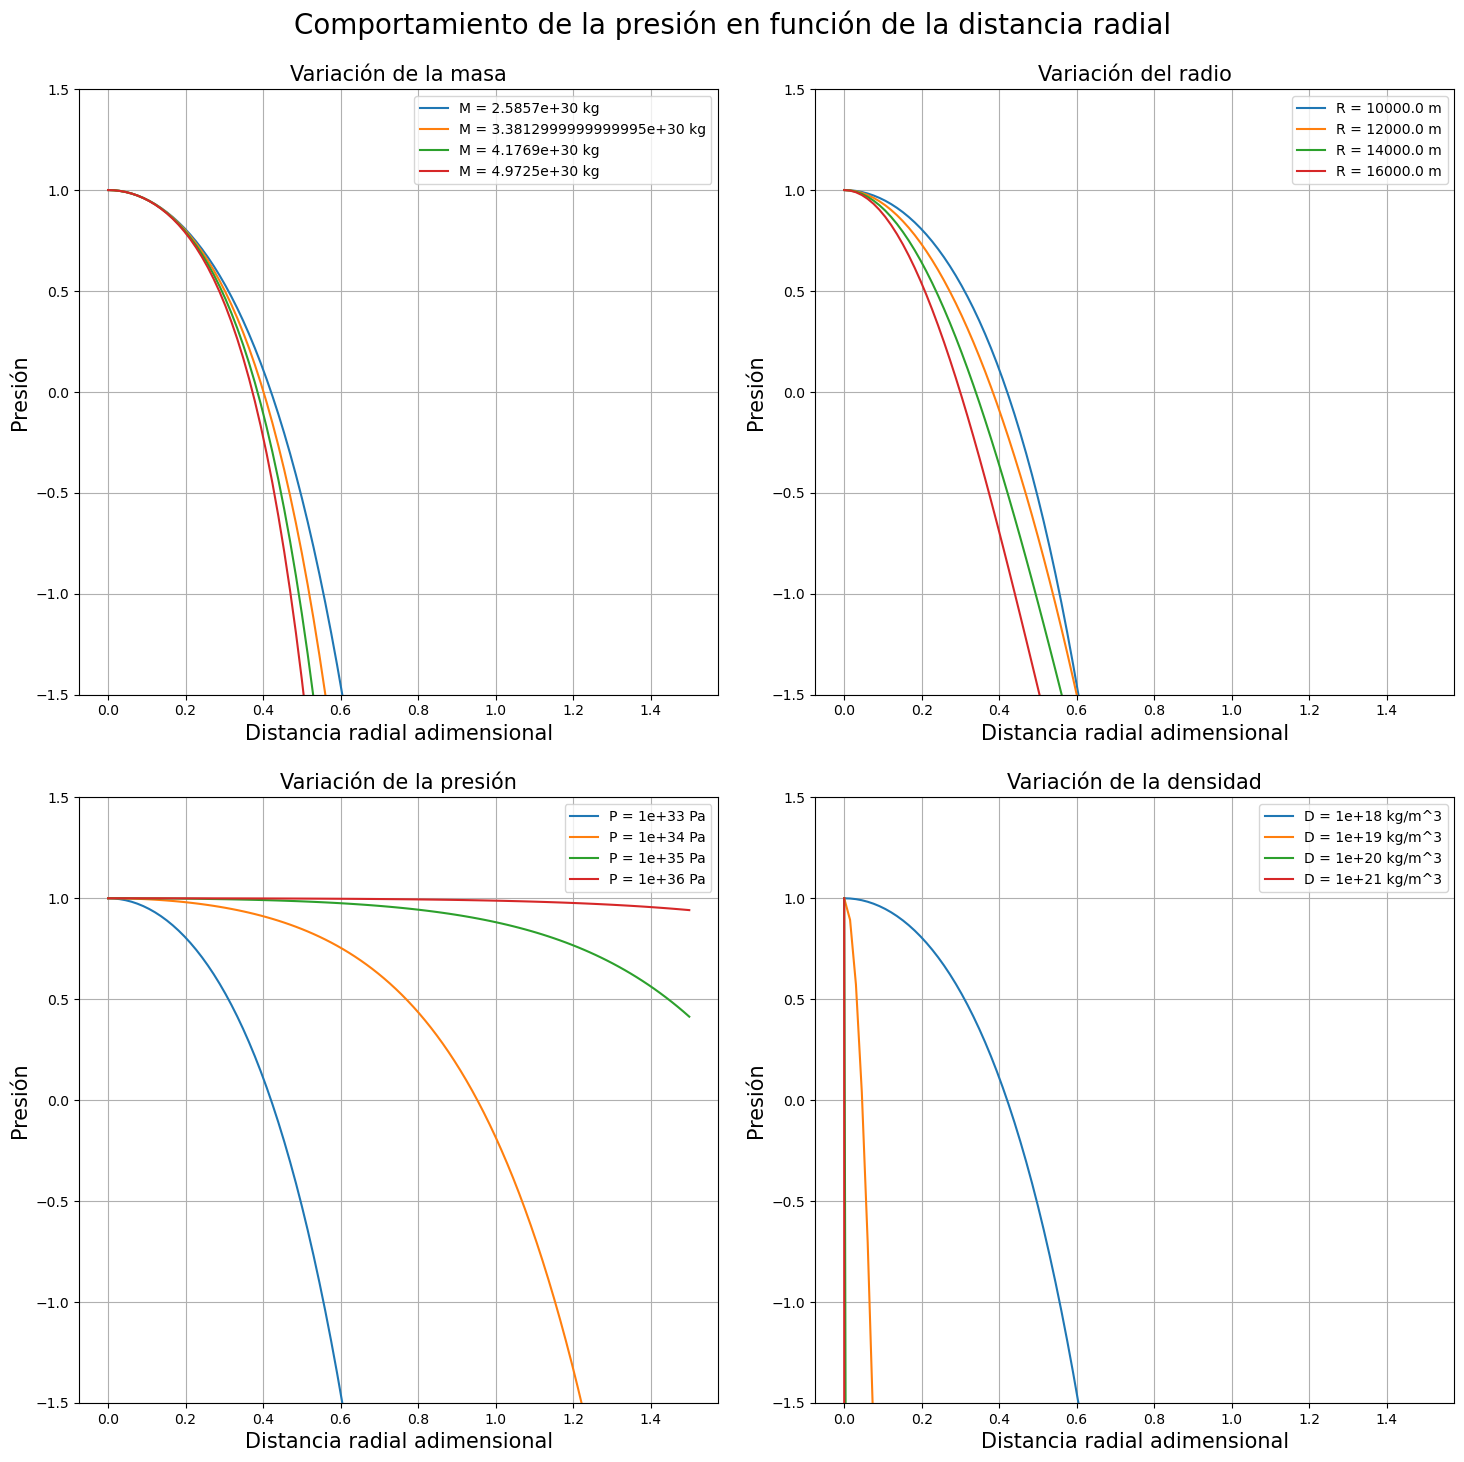

In [46]:
# Realizamos una gráfica con cuatro subplots en los que, en cada uno, se varíen los parámetros del cuerpo en cuanto a
# masa total (M), radio (R), presión central (P) y densidad central (D). En cada uno de los subplots se varía un parámetro
# todo esto dentro del rango de los objetos compactos.

#Definimos la lista de parametros a variar
MASAS = np.array([1.3, 1.7, 2.1, 2.5])*1.989e30
RADIOS = np.array([10, 12, 14, 16])*1e3
PRESIONES = np.array([1e33, 1e34, 1e35, 1e36])
DENSIDADES = np.array([1e18, 1e19, 1e20, 1e21])

#Definimos la función que calcula los parámetros adimensionales
def params(M,R,P,D):
    u = M*G/(R*(c)**2)
    k = P/(D*(c)**2)
    n = (D/(M/((4/3)*np.pi*(R**3))))
    return u,k,n

#Iniciamos la figura
fig, axs = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle('Comportamiento de la presión en función de la distancia radial', fontsize=20)

for i in range(4):
    if i == 0:
        for j in range(4):
            u,k,n = params(MASAS[j], RADIOS[0], PRESIONES[0], DENSIDADES[0])
            inte = sym.integrate(dPdr_N(mass(n),density(n),newt(10,mass(n),n),u,k),r_) +1
            N = sym.lambdify(r_, inte)
            x=np.linspace(0,1.5,100)
            axs[0,0].plot(x, N(x), label = 'M = '+str(MASAS[j])+' kg')
        axs[0,0].set_title('Variación de la masa', fontsize=15)
        axs[0,0].set_xlabel('Distancia radial adimensional', fontsize=15)
        axs[0,0].set_ylabel('Presión', fontsize=15)
        axs[0,0].legend()
        axs[0,0].grid()
        axs[0,0].set_ylim(-1.5,1.5)
    elif i == 1:
        for j in range(4):
            u,k,n = params(MASAS[0], RADIOS[j], PRESIONES[0], DENSIDADES[0])
            inte = sym.integrate(dPdr_N(mass(n),density(n),newt(10,mass(n),n),u,k),r_) +1
            N = sym.lambdify(r_, inte)
            x=np.linspace(0,1.5,100)
            axs[0,1].plot(x, N(x), label = 'R = '+str(RADIOS[j])+' m')
        axs[0,1].set_title('Variación del radio', fontsize=15)
        axs[0,1].set_xlabel('Distancia radial adimensional', fontsize=15)
        axs[0,1].set_ylabel('Presión', fontsize=15)
        axs[0,1].legend()
        axs[0,1].grid()
        axs[0,1].set_ylim(-1.5,1.5)
    elif i == 2:
        for j in range(4):
            u,k,n = params(MASAS[0], RADIOS[0], PRESIONES[j], DENSIDADES[0])
            inte = sym.integrate(dPdr_N(mass(n),density(n),newt(10,mass(n),n),u,k),r_) +1
            N = sym.lambdify(r_, inte)
            x=np.linspace(0,1.5,100)
            axs[1,0].plot(x, N(x), label = 'P = '+str(PRESIONES[j])+' Pa')
        axs[1,0].set_title('Variación de la presión', fontsize=15)
        axs[1,0].set_xlabel('Distancia radial adimensional', fontsize=15)
        axs[1,0].set_ylabel('Presión', fontsize=15)
        axs[1,0].legend()
        axs[1,0].grid()
        axs[1,0].set_ylim(-1.5,1.5)
    elif i == 3:
        for j in range(4):
            u,k,n = params(MASAS[0], RADIOS[0], PRESIONES[0], DENSIDADES[j])
            inte = sym.integrate(dPdr_N(mass(n),density(n),newt(10,mass(n),n),u,k),r_) +1
            N = sym.lambdify(r_, inte)
            x=np.linspace(0,1.5,100)
            axs[1,1].plot(x, N(x), label = 'D = '+str(DENSIDADES[j])+' kg/m^3')
        axs[1,1].set_title('Variación de la densidad', fontsize=15)
        axs[1,1].set_xlabel('Distancia radial adimensional', fontsize=15)
        axs[1,1].set_ylabel('Presión', fontsize=15)
        axs[1,1].legend()
        axs[1,1].grid()
        axs[1,1].set_ylim(-1.5,1.5)

#Eliminamos el espacio entre los subplots
fig.tight_layout(pad=2.0)

plt.show()